In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
humanFreedomIndex = pd.read_csv('../Datasets/hfi_cc_2018.csv')
hfi = pd.read_csv("../Datasets/hfi_cc_2018.csv")
aux =  pd.read_csv("../Datasets/GDPC (copy).csv")

In [35]:
aux = aux.sort_values('Countries')
aux_1 = aux.drop('Countries', axis=1).T


In [36]:
x = aux_1[:][0]
y = aux_1[:][1]
z = pd.concat([x, y])
for i in range(2,156):
    y = aux_1[:][i]
    z = pd.concat([z, y])
dataset = pd.DataFrame({'PIB':z})

In [37]:
hfi_sorted = hfi.sort_values(['countries', 'year'])
hfi_sorted['PIB'] = dataset.values

In [38]:
table = pd.pivot_table(hfi_sorted,values=hfi_sorted.columns.to_list()[4:],index=['year','countries'], dropna=False)

# Correlação:

* Sperman
* Regularização
* Laço
* Treshold

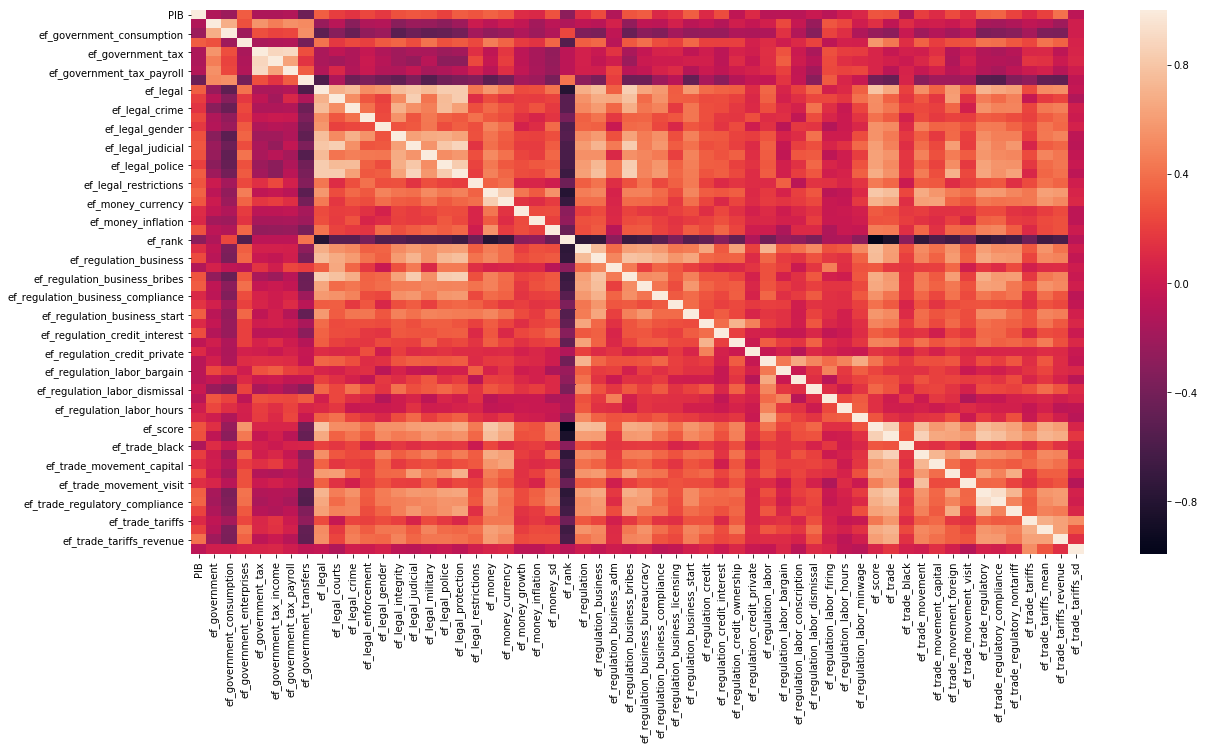

In [39]:
trans = table.transpose()
tr = trans[:58].transpose()
plt.rcParams['figure.figsize']=20,10
sns.heatmap(tr.corr(method='spearman'));

In [40]:
tr_2 = trans[61:]
tr_2 = tr_2.transpose()
tr_2['PIB'] = trans.transpose()['PIB']

In [41]:
corr_matrix = table.corr()
#corr_matrix['PIB'].sort_values(ascending=False)

In [42]:
regression_dataframe = hfi_sorted.drop(['ISO_code','countries','region'],axis = 1)
#regression_dataframe.isnull()

In [43]:
regression_dataframe = regression_dataframe.fillna(0,axis = 'columns')
regression_dataframe = regression_dataframe.fillna(0,axis = 'rows')
#regression_dataframe.isnull()

In [44]:
from sklearn.model_selection import train_test_split
X = regression_dataframe.drop('PIB',axis = 1)
y = regression_dataframe['PIB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)

In [117]:
complete = pd.read_csv('../Datasets/CompleteDataset.csv')

In [60]:
table = pd.pivot_table(complete,values=complete.columns.to_list()[4:],index=['year','countries'],dropna=True)

In [103]:
comp_2015 = table.xs(2015)
comp_2015 = comp_2015.fillna(0)

In [104]:
x_train = comp_2015.drop(['PIB','Variation'], axis=1)
y_train = comp_2015['Variation']

In [105]:
x_test = table.xs(2016).fillna(0).drop(['PIB','Variation'], axis=1)
y_test = table.xs(2016).fillna(0)['Variation']

In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score

In [107]:
en_model = ElasticNet()

In [108]:
en_model.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
y_predict = en_model.predict(x_test)

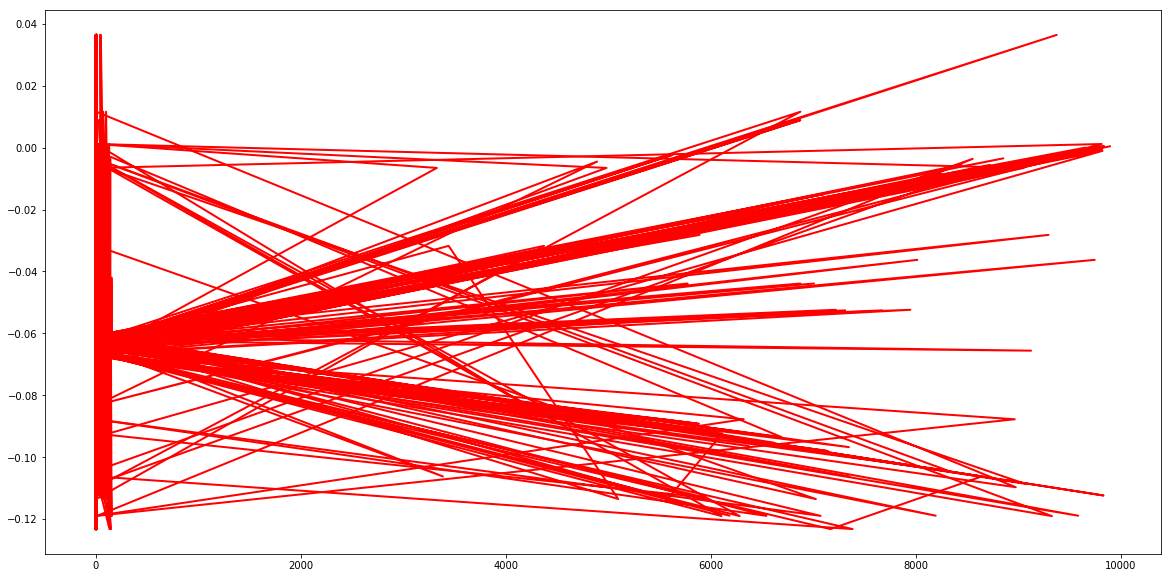

In [116]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_predict, color='red', linewidth=2)
plt.show()